读入分析数据

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
    
import openpyxl


In [3]:
file_path = "D:\Mathematical-Contest-in-Modeling\C题\附件.xlsx"
        
df = pd.read_excel(file_path, engine='openpyxl')

print(f"总行数: {df.shape[0]}")
print(f"总列数: {df.shape[1]}")
print("\n列名及数据类型:")
print(df.dtypes)

print(df.head())

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\86185\AppData\Local\Temp\ipykernel_2364\1924082747.py:1: SyntaxWarning: invalid escape sequence '\M'
  file_path = "D:\Mathematical-Contest-in-Modeling\C题\附件.xlsx"


总行数: 1082
总列数: 31

列名及数据类型:
序号                int64
孕妇代码             object
年龄                int64
身高              float64
体重              float64
末次月经             object
IVF妊娠            object
检测日期             object
检测抽血次数            int64
检测孕周             object
孕妇BMI           float64
原始读段数             int64
在参考基因组上比对的比例    float64
重复读段的比例         float64
唯一比对的读段数          int64
GC含量            float64
13号染色体的Z值       float64
18号染色体的Z值       float64
21号染色体的Z值       float64
X染色体的Z值         float64
Y染色体的Z值         float64
Y染色体浓度          float64
X染色体浓度          float64
13号染色体的GC含量     float64
18号染色体的GC含量     float64
21号染色体的GC含量     float64
被过滤掉读段数的比例      float64
染色体的非整倍体         object
怀孕次数             object
生产次数              int64
胎儿是否健康           object
dtype: object
   序号  孕妇代码  年龄     身高    体重                 末次月经 IVF妊娠      检测日期  检测抽血次数  \
0   1  A001  31  160.0  72.0  2023-02-01 00:00:00  自然受孕  20230429       1   
1   2  A001  31  160.0  73.0  2023-02-01 00:00:00  自然受孕  202

In [4]:
# gc含量异常判定

# 1.（>0.65 或 <0.35）
con = (df['GC含量'] > 0.65) | (df['GC含量'] < 0.35)
con_rows = df[con]

gc_max = df['GC含量'].max()
gc_min = df['GC含量'].min()

print(f"\nGC含量范围: [{gc_min:.6f}, {gc_max:.6f}]")
print(f"异常阈值: <0.35 或 >0.65")
print(f"异常样本数量: {len(con_rows)}")


GC含量范围: [0.386250, 0.421373]
异常阈值: <0.35 或 >0.65
异常样本数量: 0


In [5]:
labels = ['13号染色体的GC含量', '18号染色体的GC含量', '21号染色体的GC含量']
gc_maxx, gc_minn = [0]*3, [0]*3
for i in range(3):
    gc_maxx[i] = df[labels[i]].max()
    gc_minn[i] = df[labels[i]].min()
    print(gc_maxx, gc_minn)


for j in range(1082):
    if np.abs(df[labels[1]][j] - df[labels[0]][j]) >= 0.025 or  np.abs(df[labels[1]][j] - df[labels[2]][j]) >= 0.025 or np.abs( df[labels[0]][j] - df[labels[2]][j] >= 0.025) :
        print(f"{j}列分布异常")

[0.402934581, 0, 0] [0.366486967, 0, 0]
[0.402934581, 0.412192792, 0] [0.366486967, 0.378464788, 0]
[0.402934581, 0.412192792, 0.425052136] [0.366486967, 0.378464788, 0.385214418]


In [6]:
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("存在缺失值的列:")
    print(missing_values[missing_values > 0])

存在缺失值的列:
末次月经         12
染色体的非整倍体    956
dtype: int64


In [7]:
if '末次月经' in df.columns:
    
    # 1. 转换为日期格式
    df_temp = pd.to_datetime(df['末次月经'], format='%Y/%m/%d', errors='coerce')
    
    # 2. 转换为相对于2022-01-01的天数差
    reference_date = pd.Timestamp('2022-01-01')
    days_diff = (df_temp - reference_date).dt.days
    
    # 中位数填充缺失值
    median_days = days_diff.median()
    df['末次月经_天数差'] = days_diff.fillna(median_days).astype('int64')
    
    print("末次月经列转换完成")
    print(f"转换后示例: {df['末次月经_天数差'].head().tolist()}")

if '染色体的非整倍体' in df.columns and df['染色体的非整倍体'].isnull().sum() > 0:
    # 用None填充
    df['染色体的非整倍体'].fillna('None', inplace=True)
    print("列 '染色体的非整倍体' 用None填充")

末次月经列转换完成
转换后示例: [396, 396, 396, 396, 677]
列 '染色体的非整倍体' 用None填充


C:\Users\86185\AppData\Local\Temp\ipykernel_2364\1555978953.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['染色体的非整倍体'].fillna('None', inplace=True)


In [8]:
print("\n=== 填充后缺失值检查 ===")
missing_after = df.isnull().sum()
print(missing_after[missing_after > 0])

df.to_excel('附件_填充.xlsx', index=False)


=== 填充后缺失值检查 ===
末次月经    12
dtype: int64


In [9]:
df = pd.read_excel('附件_填充.xlsx')

print("处理前数据类型:")
print(df.dtypes)

# 1. IVF妊娠列：自然受孕->0, IVF（试管婴儿）->1, IUI（人工授精）->2
if 'IVF妊娠' in df.columns:
    print("IVF妊娠列唯一值:", df['IVF妊娠'].unique())

    # 创建新列
    df['IVF妊娠_编码'] = df['IVF妊娠'].apply(lambda x: 
        0 if x == '自然受孕' 
        else 1 if x == 'IVF（试管婴儿）' 
        else 2 if x == 'IUI（人工授精）' 
        else x
    )
    df['IVF妊娠_编码'] = df['IVF妊娠_编码'].astype('int64')
    print("IVF妊娠列转换完成")

if '检测孕周' in df.columns:
    def convert_gestational_week(week_str):
        try:
            week_str = str(week_str).replace(' ', '')
            if 'w+' in week_str:
                parts = week_str.split('w+')
                weeks = int(parts[0])
                days = int(parts[1]) if parts[1] != '' else 0
                return weeks * 7 + days
            elif week_str.endswith('w'):
                weeks = int(week_str[:-1])
                return weeks * 7
            else:
                return int(float(week_str)) * 7  
        except:
            return np.nan
    
    df['检测孕周_天数'] = df['检测孕周'].apply(convert_gestational_week)
    # 如果有NaN值，使用fillna处理
    if df['检测孕周_天数'].isnull().any():
        df['检测孕周_天数'] = df['检测孕周_天数'].fillna(0).astype('int64')
    else:
        df['检测孕周_天数'] = df['检测孕周_天数'].astype('int64')
    print("检测孕周转天数转换完成")

if '染色体的非整倍体' in df.columns:
    print("染色体的非整倍体列唯一值:", df['染色体的非整倍体'].unique())
    
    df['T13'] = 0
    df['T18'] = 0
    df['T21'] = 0
    
    for idx, value in df['染色体的非整倍体'].items():
        value_str = str(value)
        if 'T13' in value_str:
            df.at[idx, 'T13'] = 1
        if 'T18' in value_str:
            df.at[idx, 'T18'] = 1
        if 'T21' in value_str:
            df.at[idx, 'T21'] = 1
    
    df['T13'] = df['T13'].astype('int64')
    df['T18'] = df['T18'].astype('int64')
    df['T21'] = df['T21'].astype('int64')
    print("染色体的非整倍体列转换完成")

# 4. 怀孕次数列：创建两列
if '怀孕次数' in df.columns and '生产次数' in df.columns:
    print("怀孕次数列唯一值:", df['怀孕次数'].unique())
    
    # 创建怀孕次数（3）列：≥3换成3
    df['怀孕次数（3）'] = df['怀孕次数'].replace('≥3', '3').astype('int64')
    
    # 创建怀孕次数（4）列：≥3换成4
    df['怀孕次数（4）'] = df['怀孕次数'].replace('≥3', '4').astype('int64')
    
    df['怀孕失败次数（3）'] = df['怀孕次数（3）'] - df['生产次数']
    df['怀孕失败次数（4）'] = df['怀孕次数（4）'] - df['生产次数']
    
    df['怀孕失败次数（3）'] = df['怀孕失败次数（3）'].clip(lower=0)
    df['怀孕失败次数（4）'] = df['怀孕失败次数（4）'].clip(lower=0)

# 5. 胎儿是否健康列：是->1，否->0
df['胎儿是否健康_编码'] = df['胎儿是否健康'].apply(lambda x: 
    1 if x == '是' 
    else 0 if x == '否' 
    else x
)
df['胎儿是否健康_编码'] = df['胎儿是否健康_编码'].astype('int64')
print("胎儿是否健康列转换完成")

if '末次月经' in df.columns:
    print("处理末次月经列...")
    
    df_temp = pd.to_datetime(df['末次月经'], format='%Y/%m/%d', errors='coerce')
    
    # 转换为相对于2022-01-01的天数差
    reference_date = pd.Timestamp('2022-01-01')
    days_diff = (df_temp - reference_date).dt.days
    
    median_days = days_diff.median()

    # 用中位数填充缺失值
    df['末次月经_天数差'] = days_diff.fillna(median_days).astype('int64')
    

print("\n处理后数据类型:")
print(df.dtypes)

# 保存为新的Excel文件
output_filename = '附件_降维.xlsx'
df.to_excel(output_filename, index=False)

处理前数据类型:
序号                int64
孕妇代码             object
年龄                int64
身高              float64
体重              float64
末次月经             object
IVF妊娠            object
检测日期             object
检测抽血次数            int64
检测孕周             object
孕妇BMI           float64
原始读段数             int64
在参考基因组上比对的比例    float64
重复读段的比例         float64
唯一比对的读段数          int64
GC含量            float64
13号染色体的Z值       float64
18号染色体的Z值       float64
21号染色体的Z值       float64
X染色体的Z值         float64
Y染色体的Z值         float64
Y染色体浓度          float64
X染色体浓度          float64
13号染色体的GC含量     float64
18号染色体的GC含量     float64
21号染色体的GC含量     float64
被过滤掉读段数的比例      float64
染色体的非整倍体         object
怀孕次数             object
生产次数              int64
胎儿是否健康           object
末次月经_天数差          int64
dtype: object
IVF妊娠列唯一值: ['自然受孕' 'IUI（人工授精）' 'IVF（试管婴儿）']
IVF妊娠列转换完成
检测孕周转天数转换完成
染色体的非整倍体列唯一值: [nan 'T18' 'T13T18' 'T21' 'T13' 'T13T18T21']
染色体的非整倍体列转换完成
怀孕次数列唯一值: [1 2 '≥3']
胎儿是否健康列转换完成
处理末次月经列...

处理后数据类型:
序号             

In [10]:
import pandas as pd

df = pd.read_excel("附件_降维_XY.xlsx")

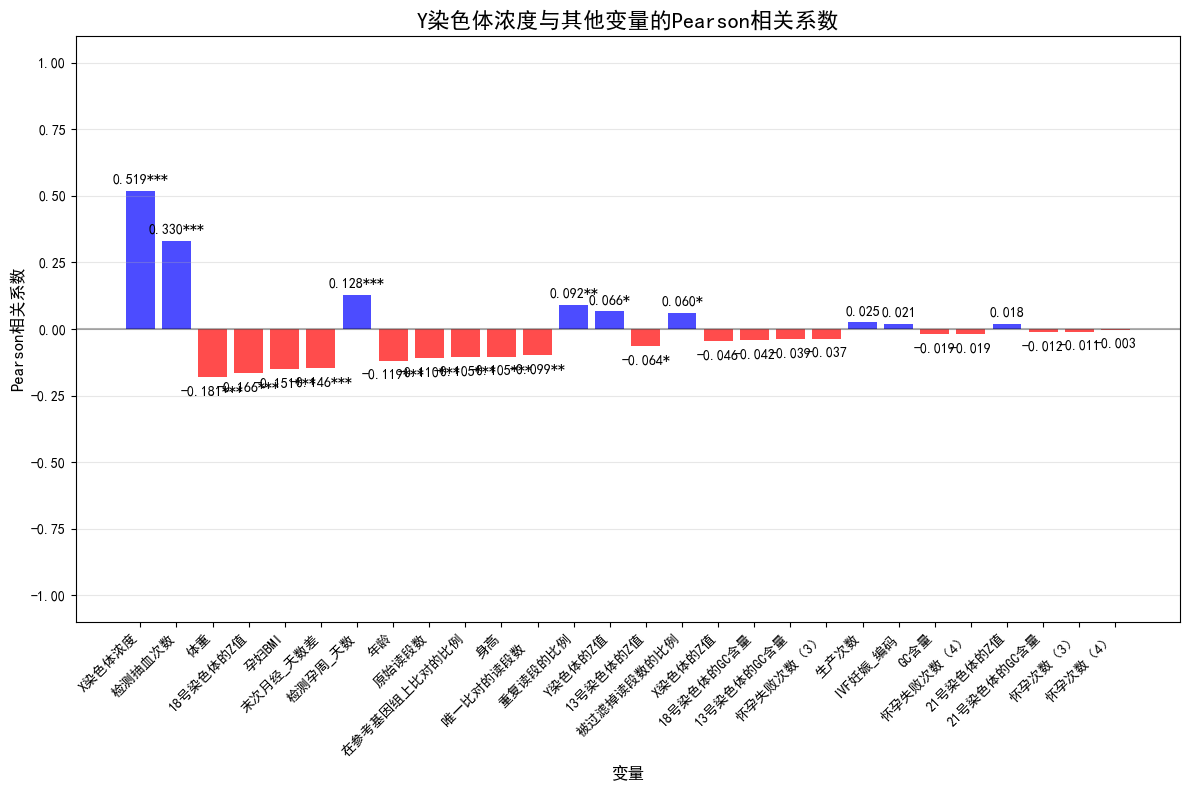

相关系数结果:
          变量      相关系数           p值
      X染色体浓度  0.518596 1.597352e-75
      检测抽血次数  0.329890 6.964737e-29
          体重 -0.180601 2.190083e-09
   18号染色体的Z值 -0.165558 4.316891e-08
       孕妇BMI -0.151300 5.736663e-07
    末次月经_天数差 -0.146246 1.358398e-06
     检测孕周_天数  0.128128 2.366585e-05
          年龄 -0.119391 8.258709e-05
       原始读段数 -0.109941 2.909991e-04
在参考基因组上比对的比例 -0.105497 5.091950e-04
          身高 -0.104651 5.650770e-04
  唯一比对的读段数   -0.098773 1.141030e-03
     重复读段的比例  0.091610 2.559087e-03
     Y染色体的Z值  0.066139 2.959820e-02
   13号染色体的Z值 -0.063780 3.593372e-02
  被过滤掉读段数的比例  0.059925 4.876341e-02
     X染色体的Z值 -0.046003 1.304692e-01
 18号染色体的GC含量 -0.042161 1.657917e-01
 13号染色体的GC含量 -0.039446 1.947891e-01
   怀孕失败次数（3） -0.037150 2.220844e-01
        生产次数  0.025351 4.048111e-01
    IVF妊娠_编码  0.020595 4.985678e-01
        GC含量 -0.019352 5.248446e-01
   怀孕失败次数（4） -0.018857 5.355025e-01
   21号染色体的Z值  0.018486 5.435686e-01
 21号染色体的GC含量 -0.012270 6.868363e-01
     怀孕次数（3） -0.0107

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 设置中文字体和SVG格式
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['savefig.format'] = 'svg'  # 设置保存格式为SVG

# 假设df是你的DataFrame
# 计算Y染色体浓度与其他数值变量的相关系数
# 首先选择数值型列（排除非数值列）
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop(['Y染色体浓度', '胎儿是否健康_编码', 'T13', 'T18', 'T21', '序号'])  

# 计算相关系数和p值
correlations = []
p_values = []
variables = []

for col in numeric_columns:
    # 删除包含NaN的行
    clean_data = df[['Y染色体浓度', col]].dropna()
    if len(clean_data) > 2:  # 确保有足够的数据点计算相关系数
        corr, p_val = pearsonr(clean_data['Y染色体浓度'], clean_data[col])
        correlations.append(corr)
        p_values.append(p_val)
        variables.append(col)

# 创建相关系数DataFrame
corr_df = pd.DataFrame({
    '变量': variables,
    '相关系数': correlations,
    'p值': p_values
})

# 按相关系数绝对值排序
corr_df = corr_df.reindex(corr_df['相关系数'].abs().sort_values(ascending=False).index)

# 创建柱状图
plt.figure(figsize=(12, 8))
bars = plt.bar(corr_df['变量'], corr_df['相关系数'], 
               color=['red' if x < 0 else 'blue' for x in corr_df['相关系数']],
               alpha=0.7)

# 添加数值标签
for i, (corr, p_val) in enumerate(zip(corr_df['相关系数'], corr_df['p值'])):
    significance = ''
    if p_val < 0.001:
        significance = '***'
    elif p_val < 0.01:
        significance = '**'
    elif p_val < 0.05:
        significance = '*'
    
    plt.text(i, corr + (0.02 if corr > 0 else -0.03), 
             f'{corr:.3f}{significance}', 
             ha='center', va='bottom' if corr > 0 else 'top')

# 设置图表标题和标签
plt.title('Y染色体浓度与其他变量的Pearson相关系数', fontsize=16, fontweight='bold')
plt.xlabel('变量', fontsize=12)
plt.ylabel('Pearson相关系数', fontsize=12)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.ylim(-1.1, 1.1)

# 旋转x轴标签以避免重叠
plt.xticks(rotation=45, ha='right')

# 添加网格
plt.grid(axis='y', alpha=0.3)

# 调整布局
plt.tight_layout()

# 保存为SVG文件
plt.savefig('y_chromosome_correlation.svg', format='svg', dpi=300, bbox_inches='tight')

# 显示图表
plt.show()

# 打印相关系数表格
print("相关系数结果:")
print(corr_df.to_string(index=False))

# 打印统计摘要
print(f"\n分析摘要:")
print(f"总共分析了 {len(correlations)} 个数值变量")
print(f"显著相关的变量数量 (p < 0.05): {sum(1 for p in p_values if p < 0.05)}")
print(f"最强正相关: {corr_df.iloc[0]['变量']} (r = {corr_df.iloc[0]['相关系数']:.3f})")
print(f"最强负相关: {corr_df.iloc[-1]['变量']} (r = {corr_df.iloc[-1]['相关系数']:.3f})")

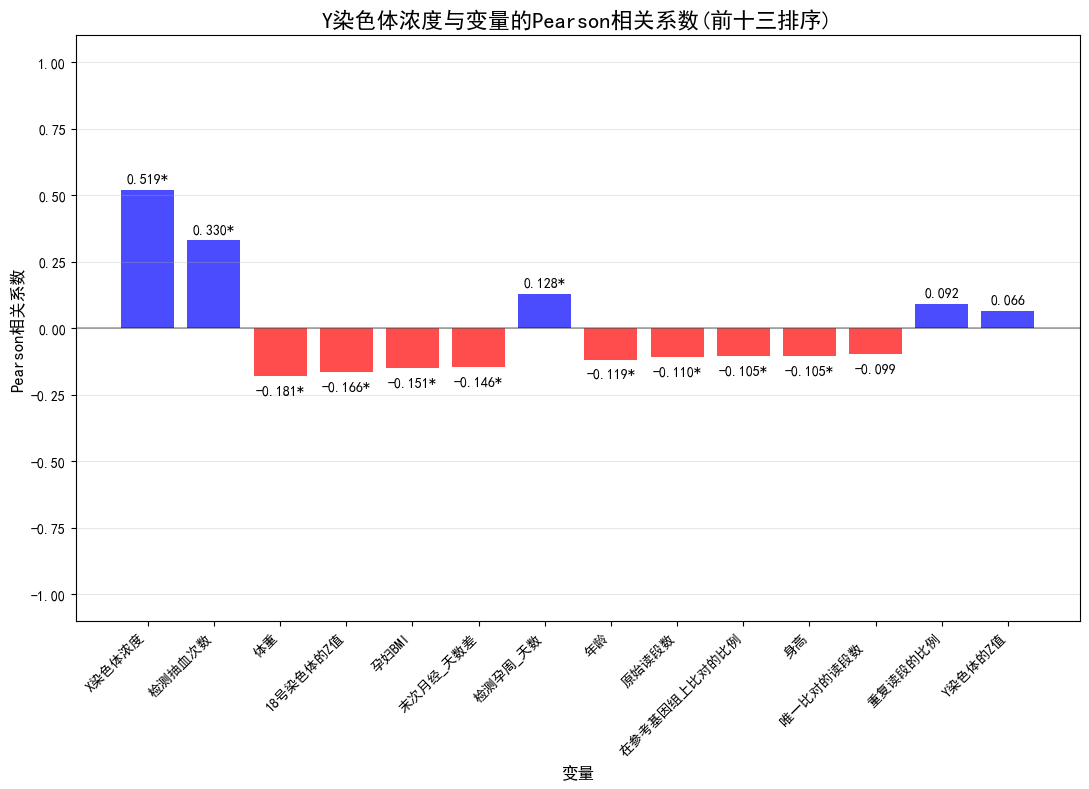

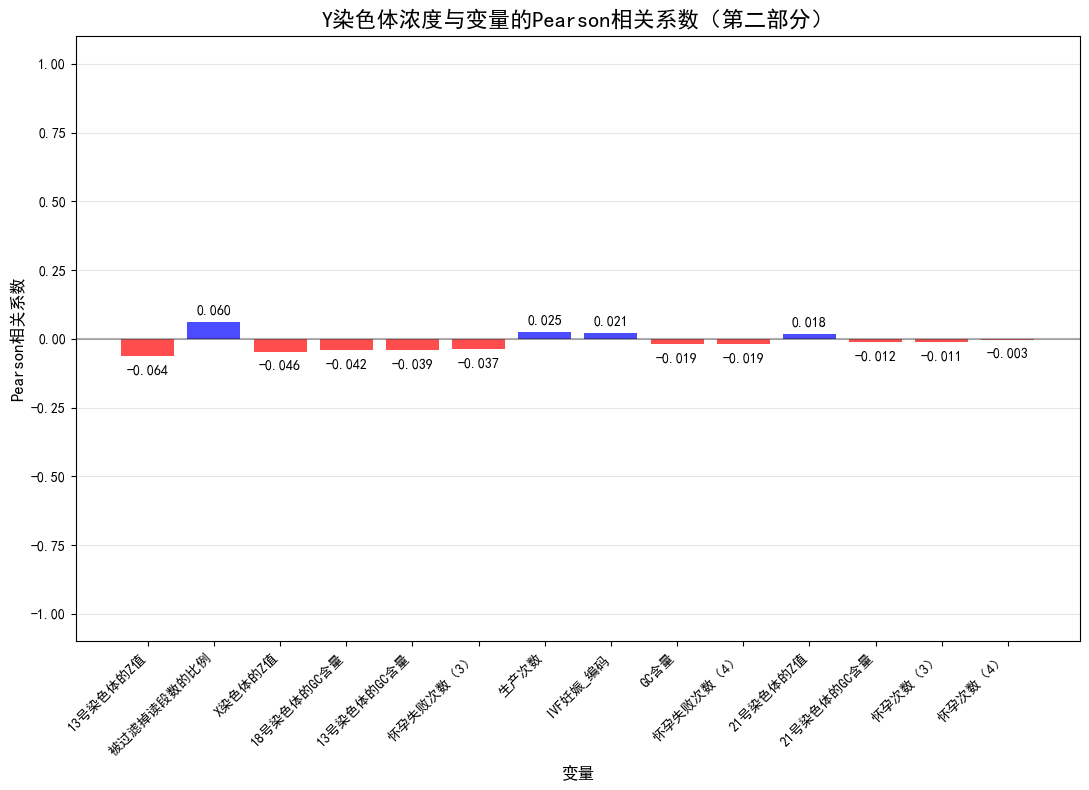

总共分析了 28 个数值变量
第一部分包含 14 个变量
第二部分包含 14 个变量

相关系数结果:
          变量      相关系数           p值
      X染色体浓度  0.518596 1.597352e-75
      检测抽血次数  0.329890 6.964737e-29
          体重 -0.180601 2.190083e-09
   18号染色体的Z值 -0.165558 4.316891e-08
       孕妇BMI -0.151300 5.736663e-07
    末次月经_天数差 -0.146246 1.358398e-06
     检测孕周_天数  0.128128 2.366585e-05
          年龄 -0.119391 8.258709e-05
       原始读段数 -0.109941 2.909991e-04
在参考基因组上比对的比例 -0.105497 5.091950e-04
          身高 -0.104651 5.650770e-04
  唯一比对的读段数   -0.098773 1.141030e-03
     重复读段的比例  0.091610 2.559087e-03
     Y染色体的Z值  0.066139 2.959820e-02
   13号染色体的Z值 -0.063780 3.593372e-02
  被过滤掉读段数的比例  0.059925 4.876341e-02
     X染色体的Z值 -0.046003 1.304692e-01
 18号染色体的GC含量 -0.042161 1.657917e-01
 13号染色体的GC含量 -0.039446 1.947891e-01
   怀孕失败次数（3） -0.037150 2.220844e-01
        生产次数  0.025351 4.048111e-01
    IVF妊娠_编码  0.020595 4.985678e-01
        GC含量 -0.019352 5.248446e-01
   怀孕失败次数（4） -0.018857 5.355025e-01
   21号染色体的Z值  0.018486 5.435686e-01
 21号染色体的GC含量

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 设置中文字体和SVG格式
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.format'] = 'svg'

# 选择数值型列，并排除【是否健康】和【Y染色体浓度】自身
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop(['Y染色体浓度', '胎儿是否健康_编码', 'T13', 'T18', 'T21', '序号'])  

# 计算相关系数和p值
correlations = []
p_values = []
variables = []

for col in numeric_columns:
    clean_data = df[['Y染色体浓度', col]].dropna()
    if len(clean_data) > 2:
        corr, p_val = pearsonr(clean_data['Y染色体浓度'], clean_data[col])
        correlations.append(corr)
        p_values.append(p_val)
        variables.append(col)

# 创建相关系数DataFrame并按相关系数绝对值排序
corr_df = pd.DataFrame({
    '变量': variables,
    '相关系数': correlations,
    'p值': p_values
})
corr_df = corr_df.reindex(corr_df['相关系数'].abs().sort_values(ascending=False).index)

# 简单地将变量分成两部分
half_index = len(corr_df) // 2
first_half = corr_df.iloc[:half_index]
second_half = corr_df.iloc[half_index:]

# 创建第一个图：前半部分变量
plt.figure(figsize=(11, 8))
bars1 = plt.bar(first_half['变量'], first_half['相关系数'], 
               color=['red' if x < 0 else 'blue' for x in first_half['相关系数']],
               alpha=0.7)

# 添加数值标签
for i, (corr, p_val) in enumerate(zip(first_half['相关系数'], first_half['p值'])):
    significance = ''
    if p_val < 0.001:
        significance = '*'    
    plt.text(i, corr + (0.02 if corr > 0 else -0.03), 
             f'{corr:.3f}{significance}', 
             ha='center', va='bottom' if corr > 0 else 'top')

plt.title('Y染色体浓度与变量的Pearson相关系数(前十三排序)', fontsize=16, fontweight='bold')
plt.xlabel('变量', fontsize=12)
plt.ylabel('Pearson相关系数', fontsize=12)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.ylim(-1.1, 1.1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('y_chromosome_correlation_part1.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

# 创建第二个图：后半部分变量
plt.figure(figsize=(11, 8))
bars2 = plt.bar(second_half['变量'], second_half['相关系数'], 
               color=['red' if x < 0 else 'blue' for x in second_half['相关系数']],
               alpha=0.7)

# 添加数值标签
for i, (corr, p_val) in enumerate(zip(second_half['相关系数'], second_half['p值'])):
    significance = ''
    if p_val < 0.001:
        significance = '*'
    
    plt.text(i, corr + (0.02 if corr > 0 else -0.03), 
             f'{corr:.3f}{significance}', 
             ha='center', va='bottom' if corr > 0 else 'top')

plt.title('Y染色体浓度与变量的Pearson相关系数（第二部分）', fontsize=16, fontweight='bold')
plt.xlabel('变量', fontsize=12)
plt.ylabel('Pearson相关系数', fontsize=12)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.ylim(-1.1, 1.1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('y_chromosome_correlation_part2.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

# 打印统计信息
print(f"总共分析了 {len(correlations)} 个数值变量")
print(f"第一部分包含 {len(first_half)} 个变量")
print(f"第二部分包含 {len(second_half)} 个变量")
print("\n相关系数结果:")
print(corr_df.to_string(index=False))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# 设置中文字体和SVG格式
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.format'] = 'svg'

# 选择要分析的离散变量（二分类变量）
# 这里假设你有以下几个二分类变量，请根据实际情况修改
discrete_variables = ['胎儿是否健康_编码', 'T13', 'T18', 'T21']

# 计算点二列相关系数和p值
pb_correlations = []
pb_p_values = []
variables = []
valid_counts = []

for col in discrete_variables:
    if col in df.columns:
        # 删除包含NaN的行
        clean_data = df[['Y染色体浓度', col]].dropna()
        
        # 确保变量是二分类的
        unique_values = clean_data[col].nunique()
        if unique_values == 2 and len(clean_data) > 2:
            # 计算点二列相关系数
            try:
                corr, p_val = pointbiserialr(clean_data['Y染色体浓度'], clean_data[col])
                pb_correlations.append(corr)
                pb_p_values.append(p_val)
                variables.append(col)
                valid_counts.append(len(clean_data))
            except:
                print(f"无法计算 {col} 的点二列相关系数")
        else:
            print(f"变量 {col} 不是二分类变量或数据不足 (唯一值: {unique_values})")
    else:
        print(f"变量 {col} 不在DataFrame中")

# 创建相关系数DataFrame
pb_corr_df = pd.DataFrame({
    '变量': variables,
    '点二列相关系数': pb_correlations,
    'p值': pb_p_values,
    '有效样本数': valid_counts
})

# 按相关系数绝对值排序
pb_corr_df = pb_corr_df.reindex(pb_corr_df['点二列相关系数'].abs().sort_values(ascending=False).index)

# 创建柱状图
plt.figure(figsize=(6, 6))
bars = plt.bar(pb_corr_df['变量'], pb_corr_df['点二列相关系数'], 
               color=['red' if x < 0 else 'blue' for x in pb_corr_df['点二列相关系数']],
               alpha=0.7)

# 添加数值标签
for i, (corr, p_val) in enumerate(zip(pb_corr_df['点二列相关系数'], pb_corr_df['p值'])):
    significance = ''
    if p_val < 0.001:
        significance = '***'
    elif p_val < 0.01:
        significance = '**'
    elif p_val < 0.05:
        significance = '*'
    
    plt.text(i, corr + (0.02 if corr > 0 else -0.03), 
             f'{corr:.3f}{significance}', 
             ha='center', va='bottom' if corr > 0 else 'top',
             fontweight='bold')

# 设置图表标题和标签
plt.title('Y染色体浓度与离散变量的点二列相关系数', fontsize=16, fontweight='bold')
plt.xlabel('离散变量', fontsize=12)
plt.ylabel('点二列相关系数', fontsize=12)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.ylim(-1.1, 1.1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# 保存为SVG文件
plt.savefig('y_chromosome_pointbiserial_correlation.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

# 打印详细结果
print("点二列相关系数分析结果:")
print("=" * 50)
print(pb_corr_df.to_string(index=False))
print("\n" + "=" * 50)

# 打印统计摘要
print(f"\n分析摘要:")
print(f"总共分析了 {len(discrete_variables)} 个离散变量")
print(f"有效分析的二分类变量数量: {len(pb_correlations)}")
print(f"显著相关的变量数量 (p < 0.05): {sum(1 for p in pb_p_values if p < 0.05)}")

if len(pb_correlations) > 0:
    print(f"最强正相关: {pb_corr_df.iloc[0]['变量']} (r = {pb_corr_df.iloc[0]['点二列相关系数']:.3f})")
    if any(pb_corr_df['点二列相关系数'] < 0):
        negative_df = pb_corr_df[pb_corr_df['点二列相关系数'] < 0]
        if len(negative_df) > 0:
            print(f"最强负相关: {negative_df.iloc[-1]['变量']} (r = {negative_df.iloc[-1]['点二列相关系数']:.3f})")

# 可选：显示每个变量的描述统计
print("\n各变量的描述统计:")
for col in variables:
    print(f"\n变量: {col}")
    print(f"取值分布: {df[col].value_counts().to_dict()}")
    group_means = df.groupby(col)['Y染色体浓度'].mean()
    print(f"各组Y染色体浓度均值: {group_means.to_dict()}")

互信息分析结果:
          变量      互信息    数据类型
      X染色体浓度 0.243041 float64
     检测孕周_天数 0.068007   int64
       孕妇BMI 0.054471 float64
          体重 0.048961 float64
      检测抽血次数 0.040437   int64
   怀孕失败次数（3） 0.038851   int64
        生产次数 0.038127   int64
     怀孕次数（4） 0.033977   int64
     怀孕次数（3） 0.033907   int64
        怀孕次数 0.033859  object
   怀孕失败次数（4） 0.029146   int64
   13号染色体的Z值 0.028032 float64
        GC含量 0.026351 float64
          身高 0.022831 float64
  唯一比对的读段数   0.022673   int64
     重复读段的比例 0.017011 float64
         T18 0.016520   int64
 21号染色体的GC含量 0.015716 float64
      胎儿是否健康 0.014739  object
   胎儿是否健康_编码 0.014739   int64
    IVF妊娠_编码 0.006534   int64
       IVF妊娠 0.006534  object
在参考基因组上比对的比例 0.005380 float64
    染色体的非整倍体 0.004914  object
   21号染色体的Z值 0.002572 float64
  被过滤掉读段数的比例 0.000000 float64
     X染色体的Z值 0.000000 float64
         T13 0.000000   int64
         T21 0.000000   int64
   18号染色体的Z值 0.000000 float64
       原始读段数 0.000000   int64


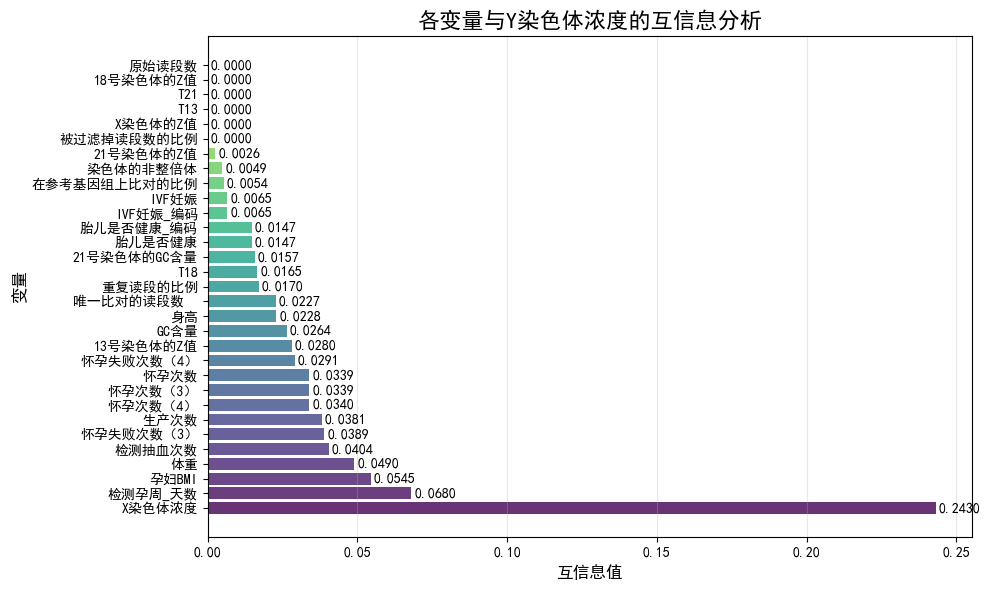

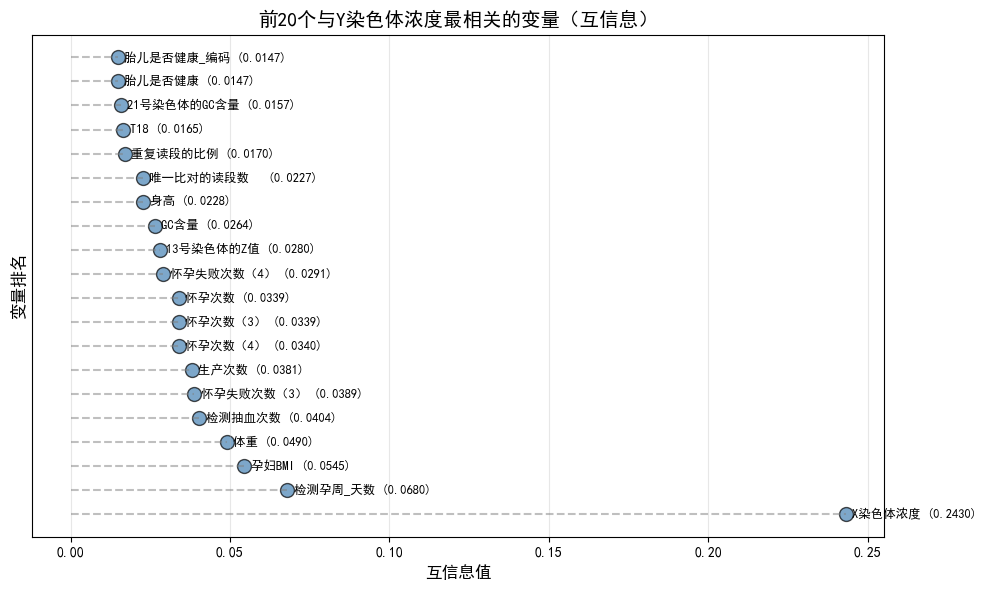

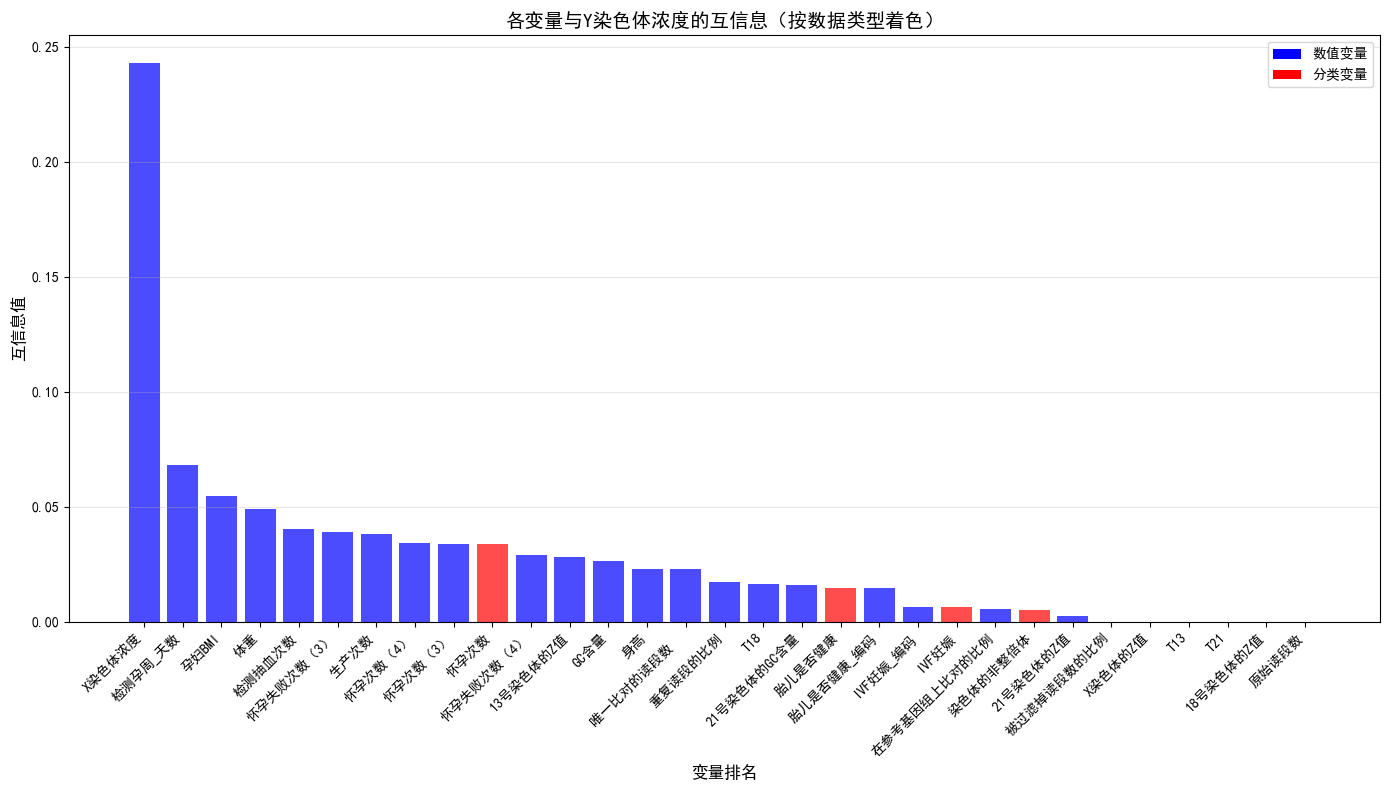


互信息分析摘要:
总共分析变量数量: 31
数值变量数量: 27
分类变量数量: 4
最高互信息值: 0.2430 (X染色体浓度)
最低互信息值: 0.0000 (原始读段数)
平均互信息值: 0.0280


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 设置中文字体和SVG格式
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.format'] = 'svg'

def calculate_mutual_info(df):
    """
    计算所有变量与目标变量的互信息
    """
    # 复制数据以避免修改原数据
    data = df.copy()
    
    # 分离目标变量
    y = data["Y染色体浓度"]
    X = data.drop(columns=["序号", "孕妇代码", "末次月经_天数差", "检测日期", "Y染色体浓度", "Y染色体的Z值", 
                           "末次月经", "年龄", "13号染色体的GC含量", "检测孕周", "18号染色体的GC含量"])   # 去掉非数值的列和因变量
    
    # 预处理：对分类变量进行编码，对数值变量进行标准化
    le = LabelEncoder()
    scaler = StandardScaler()
    
    X_processed = X.copy()
    for col in X_processed.columns:
        if X_processed[col].dtype == 'object' or X_processed[col].nunique() < 10:
            # 分类变量或低基数变量使用标签编码
            try:
                X_processed[col] = le.fit_transform(X_processed[col].astype(str).fillna('Missing'))
            except:
                X_processed[col] = X_processed[col].astype('category').cat.codes
        else:
            # 数值变量标准化并处理缺失值
            if X_processed[col].isna().any():
                X_processed[col] = X_processed[col].fillna(X_processed[col].median())
            X_processed[col] = scaler.fit_transform(X_processed[col].values.reshape(-1, 1)).flatten()
    
    # 处理目标变量的缺失值
    valid_indices = ~y.isna()
    X_valid = X_processed[valid_indices]
    y_valid = y[valid_indices]
    
    # 计算互信息
    mi_scores = mutual_info_regression(X_valid, y_valid, random_state=42)
    
    # 创建结果DataFrame
    mi_df = pd.DataFrame({
        '变量': X.columns,
        '互信息': mi_scores,
        '数据类型': [str(X[col].dtype) for col in X.columns]
    })
    
    # 按互信息值排序
    mi_df = mi_df.sort_values('互信息', ascending=False)
    
    return mi_df

# 计算互信息
mi_results = calculate_mutual_info(df)

print("互信息分析结果:")
print("=" * 60)
print(mi_results.to_string(index=False))
print("=" * 60)

# 方案一：水平条形图（推荐）
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(mi_results)))

bars = plt.barh(range(len(mi_results)), mi_results['互信息'], color=colors, alpha=0.8)

# 添加数值标签
for i, (mi_score, var_name) in enumerate(zip(mi_results['互信息'], mi_results['变量'])):
    plt.text(mi_score + 0.001, i, f'{mi_score:.4f}', 
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.yticks(range(len(mi_results)), mi_results['变量'])
plt.xlabel('互信息值', fontsize=12, fontweight='bold')
plt.ylabel('变量', fontsize=12, fontweight='bold')
plt.title('各变量与Y染色体浓度的互信息分析', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('y_chromosome_mutual_info_horizontal.svg', format='svg', dpi=300)
plt.show()

# 方案二：点图（适合变量较多时）
plt.figure(figsize=(10, 6))

# 选择前20个最重要的变量（如果变量很多）
top_n = min(20, len(mi_results))
top_mi = mi_results.head(top_n)

plt.scatter(top_mi['互信息'], range(len(top_mi)), 
           s=100, alpha=0.7, color='steelblue', edgecolors='black')

# 添加连接线和标签
for i, (mi_score, var_name) in enumerate(zip(top_mi['互信息'], top_mi['变量'])):
    plt.plot([0, mi_score], [i, i], 'gray', alpha=0.5, linestyle='--')
    plt.text(mi_score + 0.002, i, f'{var_name} ({mi_score:.4f})', 
             ha='left', va='center', fontsize=9)

plt.xlabel('互信息值', fontsize=12, fontweight='bold')
plt.ylabel('变量排名', fontsize=12, fontweight='bold')
plt.title(f'前{top_n}个与Y染色体浓度最相关的变量（互信息）', fontsize=14, fontweight='bold')
plt.yticks([])
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('y_chromosome_mutual_info_dotplot.svg', format='svg', dpi=300)
plt.show()

# 方案三：分组显示（按数据类型）
plt.figure(figsize=(14, 8))

# 按数据类型分组
numeric_vars = mi_results[mi_results['数据类型'].isin(['float64', 'int64'])]
categorical_vars = mi_results[~mi_results['数据类型'].isin(['float64', 'int64'])]

x_pos = np.arange(len(mi_results))
colors = ['blue' if dtype in ['float64', 'int64'] else 'red' for dtype in mi_results['数据类型']]

bars = plt.bar(x_pos, mi_results['互信息'], color=colors, alpha=0.7)

# 添加图例
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', label='数值变量'),
    Patch(facecolor='red', label='分类变量')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.xlabel('变量排名', fontsize=12, fontweight='bold')
plt.ylabel('互信息值', fontsize=12, fontweight='bold')
plt.title('各变量与Y染色体浓度的互信息（按数据类型着色）', fontsize=14, fontweight='bold')
plt.xticks(x_pos, mi_results['变量'], rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('y_chromosome_mutual_info_grouped.svg', format='svg', dpi=300)
plt.show()

# 打印统计摘要
print("\n互信息分析摘要:")
print(f"总共分析变量数量: {len(mi_results)}")
print(f"数值变量数量: {len(numeric_vars)}")
print(f"分类变量数量: {len(categorical_vars)}")
print(f"最高互信息值: {mi_results['互信息'].max():.4f} ({mi_results['变量'].iloc[0]})")
print(f"最低互信息值: {mi_results['互信息'].min():.4f} ({mi_results['变量'].iloc[-1]})")
print(f"平均互信息值: {mi_results['互信息'].mean():.4f}")
